In [21]:
# Evaluate all saved models on the test dataset
import glob, os
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Paths
base_path = '../'
test_input_dir = os.path.join(base_path, 'ISIC_2019_Test_Input')
gt_csv = os.path.join(base_path, 'ISIC_2019_Test_GroundTruth.csv')

# Find all model files
model_paths = glob.glob(os.path.join(base_path, 'working', '*.h5'))
print("Found models:", model_paths)

Found models: ['../working\\melanoma_cnn_final_1.h5', '../working\\melanoma_cnn_final_2.h5', '../working\\melanoma_cnn_final_3.h5', '../working\\melanoma_cnn_final_4.h5', '../working\\melanoma_cnn_final_5.h5', '../working\\melanoma_cnn_final_6.h5', '../working\\melanoma_cnn_final_7.h5', '../working\\melanoma_cnn_final_8.h5', '../working\\melanoma_model.h5']


In [22]:
# models 7,8, melenoma_model
def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Vertical Kernel
    grayScale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 11))  # Vertical kernel
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    bhg = cv2.GaussianBlur(blackhat, (3,3), cv2.BORDER_DEFAULT)
    _, mask = cv2.threshold(bhg, 10, 255, cv2.THRESH_BINARY)
    dst = cv2.inpaint(img, mask, 6, cv2.INPAINT_TELEA)

    # Horizontal Kernel
    grayScale2 = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (11,7))  # Horizontal kernel
    blackhat2 = cv2.morphologyEx(grayScale2, cv2.MORPH_BLACKHAT, kernel2)
    bhg2 = cv2.GaussianBlur(blackhat2, (3,3), cv2.BORDER_DEFAULT)
    _, mask2 = cv2.threshold(bhg2, 10, 255, cv2.THRESH_BINARY)
    dst2 = cv2.inpaint(dst, mask2, 6, cv2.INPAINT_TELEA)
    grayScale3 = cv2.cvtColor(dst2, cv2.COLOR_RGB2GRAY)
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))  # Square kernel
    blackhat3 = cv2.morphologyEx(grayScale3, cv2.MORPH_BLACKHAT, kernel3)
    bhg3 = cv2.GaussianBlur(blackhat3, (3,3), cv2.BORDER_DEFAULT)
    _, mask3 = cv2.threshold(bhg3, 10, 255, cv2.THRESH_BINARY)
    dst3 = cv2.inpaint(dst2, mask3, 6, cv2.INPAINT_TELEA)

    # Median Blur
    md = cv2.medianBlur(dst3, 5)
    return md

# Rest of the models
def process_uncolored_image(img_path):
    md = process_image(img_path)
    ah = cv2.cvtColor(md, cv2.COLOR_BGR2GRAY)
    ah_eq = cv2.equalizeHist(ah)

    return ah_eq

In [23]:
import re
preprocess_funcs = {}
for path in model_paths:
    name = os.path.basename(path)
    if re.search(r"(7|8|m(e)?lanoma_model)", name, re.IGNORECASE):
        # Color models: apply process_image on uint8, normalize
        def make_color_pre():
            return lambda img: (process_image(img))
        preprocess_funcs[name] = make_color_pre()
    else:
        # Grayscale models: apply process_uncolored_image, normalize and expand dims
        def make_gray_pre():
            return lambda img: process_uncolored_image(img)
        preprocess_funcs[name] = make_gray_pre()

=== Evaluating melanoma_cnn_final_1.h5 ===


Confusion Matrix:
[[5184 1727]
 [ 620  707]]
Classification Report:
              precision    recall  f1-score   support

Non-Melanoma       0.89      0.75      0.82      6911
    Melanoma       0.29      0.53      0.38      1327

    accuracy                           0.72      8238
   macro avg       0.59      0.64      0.60      8238
weighted avg       0.80      0.72      0.74      8238



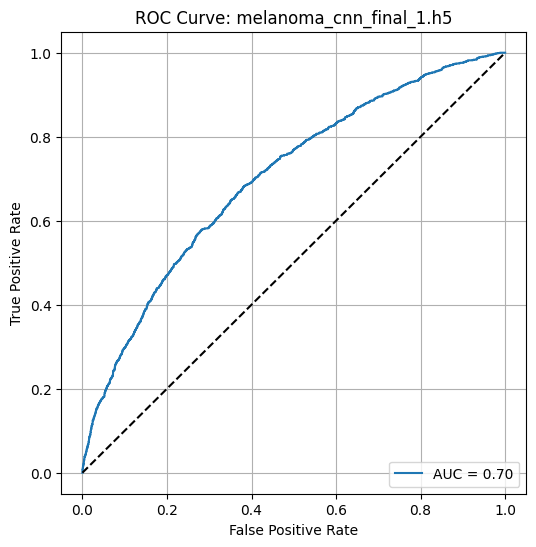

=== Evaluating melanoma_cnn_final_2.h5 ===


Confusion Matrix:
[[5186 1725]
 [ 573  754]]
Classification Report:
              precision    recall  f1-score   support

Non-Melanoma       0.90      0.75      0.82      6911
    Melanoma       0.30      0.57      0.40      1327

    accuracy                           0.72      8238
   macro avg       0.60      0.66      0.61      8238
weighted avg       0.80      0.72      0.75      8238



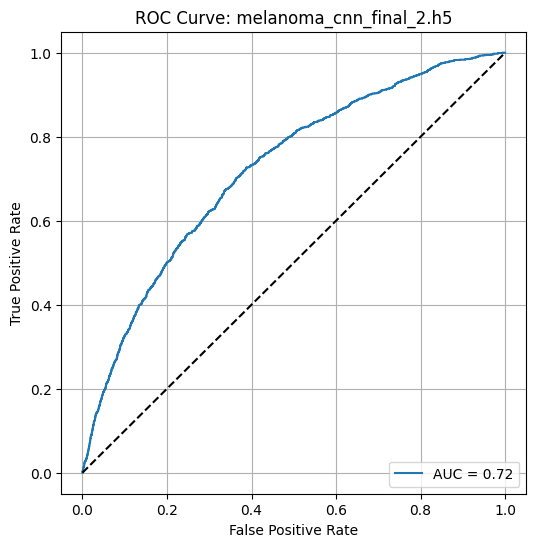

=== Evaluating melanoma_cnn_final_3.h5 ===


Confusion Matrix:
[[3131 3780]
 [ 263 1064]]
Classification Report:
              precision    recall  f1-score   support

Non-Melanoma       0.92      0.45      0.61      6911
    Melanoma       0.22      0.80      0.34      1327

    accuracy                           0.51      8238
   macro avg       0.57      0.63      0.48      8238
weighted avg       0.81      0.51      0.57      8238



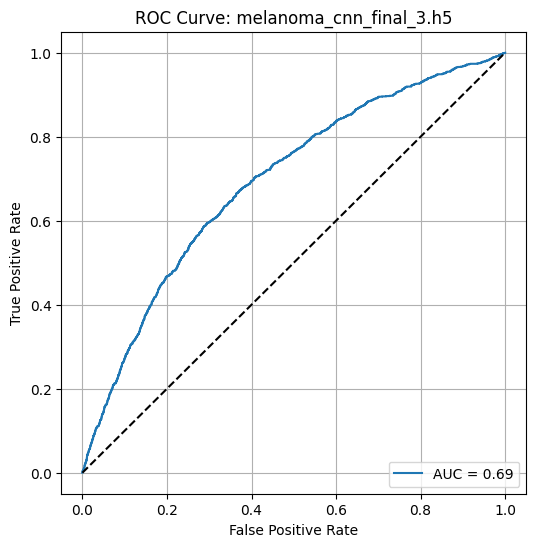

=== Evaluating melanoma_cnn_final_4.h5 ===


Confusion Matrix:
[[4044 2867]
 [ 438  889]]
Classification Report:
              precision    recall  f1-score   support

Non-Melanoma       0.90      0.59      0.71      6911
    Melanoma       0.24      0.67      0.35      1327

    accuracy                           0.60      8238
   macro avg       0.57      0.63      0.53      8238
weighted avg       0.80      0.60      0.65      8238



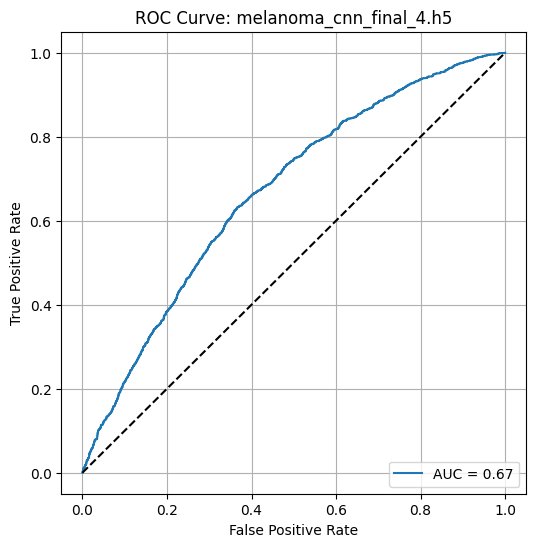

=== Evaluating melanoma_cnn_final_5.h5 ===


Confusion Matrix:
[[6168  743]
 [ 958  369]]
Classification Report:
              precision    recall  f1-score   support

Non-Melanoma       0.87      0.89      0.88      6911
    Melanoma       0.33      0.28      0.30      1327

    accuracy                           0.79      8238
   macro avg       0.60      0.59      0.59      8238
weighted avg       0.78      0.79      0.79      8238



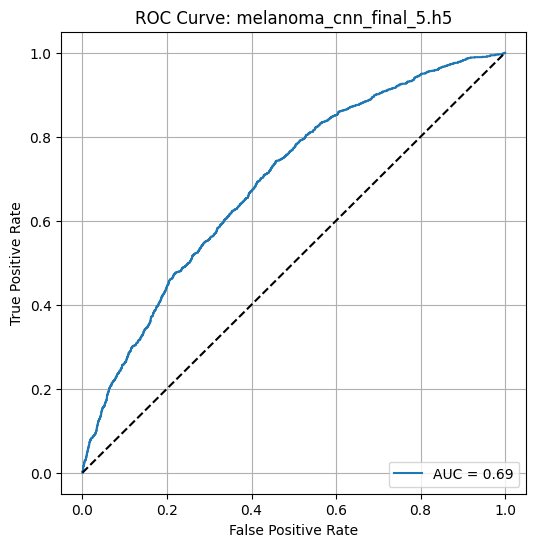

=== Evaluating melanoma_cnn_final_6.h5 ===


Confusion Matrix:
[[3407 3504]
 [ 416  911]]
Classification Report:
              precision    recall  f1-score   support

Non-Melanoma       0.89      0.49      0.63      6911
    Melanoma       0.21      0.69      0.32      1327

    accuracy                           0.52      8238
   macro avg       0.55      0.59      0.48      8238
weighted avg       0.78      0.52      0.58      8238



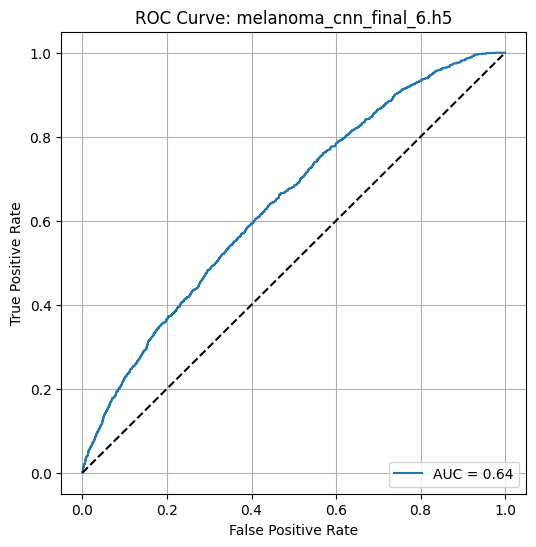

=== Evaluating melanoma_cnn_final_7.h5 ===


Confusion Matrix:
[[3163 3748]
 [1016  311]]
Classification Report:
              precision    recall  f1-score   support

Non-Melanoma       0.76      0.46      0.57      6911
    Melanoma       0.08      0.23      0.12      1327

    accuracy                           0.42      8238
   macro avg       0.42      0.35      0.34      8238
weighted avg       0.65      0.42      0.50      8238



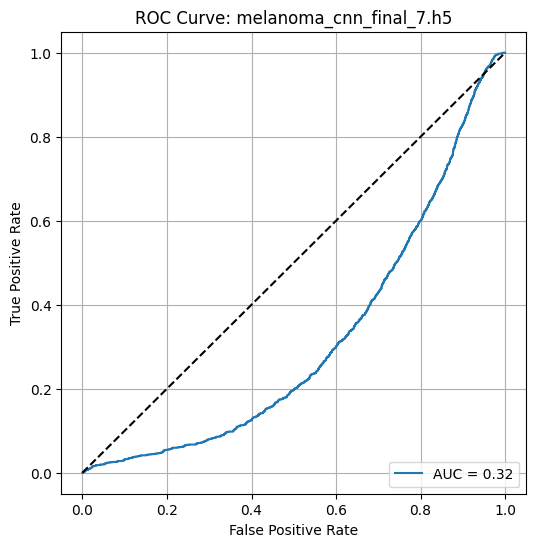

=== Evaluating melanoma_cnn_final_8.h5 ===


Confusion Matrix:
[[5167 1744]
 [1233   94]]
Classification Report:
              precision    recall  f1-score   support

Non-Melanoma       0.81      0.75      0.78      6911
    Melanoma       0.05      0.07      0.06      1327

    accuracy                           0.64      8238
   macro avg       0.43      0.41      0.42      8238
weighted avg       0.69      0.64      0.66      8238



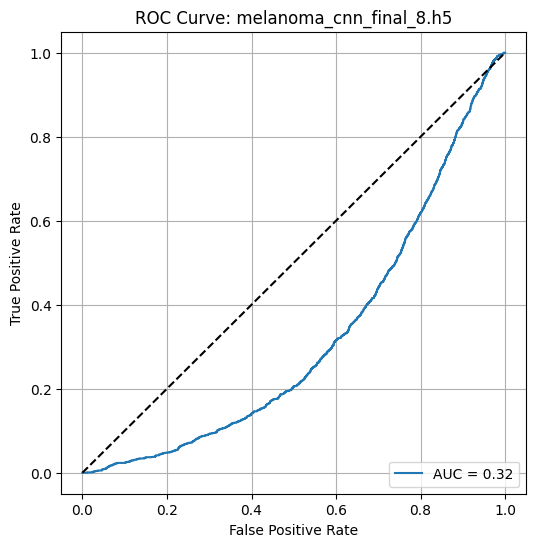

=== Evaluating melanoma_model.h5 ===


Confusion Matrix:
[[2801 4110]
 [ 903  424]]
Classification Report:
              precision    recall  f1-score   support

Non-Melanoma       0.76      0.41      0.53      6911
    Melanoma       0.09      0.32      0.14      1327

    accuracy                           0.39      8238
   macro avg       0.42      0.36      0.34      8238
weighted avg       0.65      0.39      0.47      8238



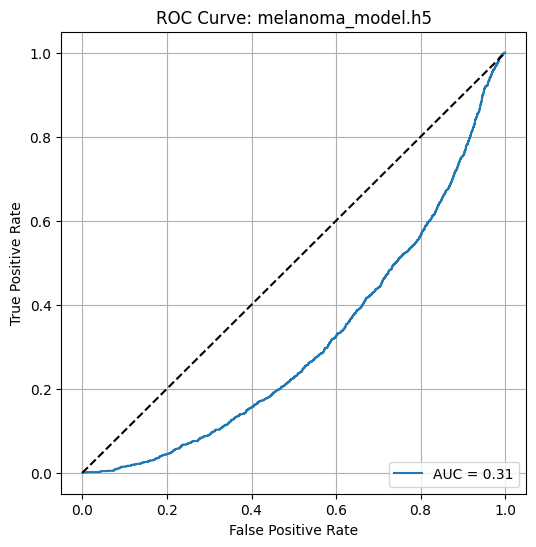

Best model: melanoma_cnn_final_2.h5 with AUC = 0.7220


In [24]:

gt_df = pd.read_csv(gt_csv)
gt_df.rename(columns={'image':'image_id','MEL':'melanoma'}, inplace=True)
# Expect columns: 'image_id' and 'melanoma'
gt_df['filepath'] = gt_df['image_id'].astype(str).apply(
    lambda x: os.path.join(test_input_dir, f"{x}.jpg")
)
y_true = gt_df['melanoma'].values

results = {}
batch_size = 32
for model_path in model_paths:
    model_name = os.path.basename(model_path)
    print(f"=== Evaluating {model_name} ===")
    model = load_model(model_path)
    preprocess = preprocess_funcs.get(model_name, lambda x: x)

    all_probs = []
    all_preds = []
    # Lazy load and preprocess in batches
    for i in range(0, len(gt_df), batch_size):
        batch = gt_df.iloc[i:i+batch_size]
        imgs = []
        for fp in batch['filepath']:
            img = preprocess(fp)
            # Resize to model input size (assuming 224x224 for this example)
            img = cv2.resize(img, (224, 224))
            img = img.astype(np.float32) / 255.0
            imgs.append(img)
        X_batch = np.stack(imgs)
        probs = model.predict(X_batch, verbose=0)
        preds = (probs > 0.5).astype(int)
        all_probs.extend(probs.flatten())
        all_preds.extend(preds.flatten())

    y_pred_proba = np.array(all_probs)
    y_pred = np.array(all_preds)

    # Metrics
    auc_score = roc_auc_score(y_true, y_pred_proba)
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Non-Melanoma', 'Melanoma']))

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve: {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    results[model_name] = {'auc': auc_score, 'confusion_matrix': cm.tolist(), 'fpr': fpr.tolist(), 'tpr': tpr.tolist()}

# Identify best model by AUC
best_model = max(results, key=lambda m: results[m]['auc'])
print(f"Best model: {best_model} with AUC = {results[best_model]['auc']:.4f}")

It feels like i made a mistake for the last three models, imma try fixing it

In [26]:
def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Vertical Kernel
    grayScale = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 11))  # Vertical kernel
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    bhg = cv2.GaussianBlur(blackhat, (3,3), cv2.BORDER_DEFAULT)
    _, mask = cv2.threshold(bhg, 10, 255, cv2.THRESH_BINARY)
    dst = cv2.inpaint(img, mask, 6, cv2.INPAINT_TELEA)

    # Horizontal Kernel
    grayScale2 = cv2.cvtColor(dst, cv2.COLOR_RGB2GRAY)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (11,7))  # Horizontal kernel
    blackhat2 = cv2.morphologyEx(grayScale2, cv2.MORPH_BLACKHAT, kernel2)
    bhg2 = cv2.GaussianBlur(blackhat2, (3,3), cv2.BORDER_DEFAULT)
    _, mask2 = cv2.threshold(bhg2, 10, 255, cv2.THRESH_BINARY)
    dst2 = cv2.inpaint(dst, mask2, 6, cv2.INPAINT_TELEA)
    grayScale3 = cv2.cvtColor(dst2, cv2.COLOR_RGB2GRAY)
    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))  # Square kernel
    blackhat3 = cv2.morphologyEx(grayScale3, cv2.MORPH_BLACKHAT, kernel3)
    bhg3 = cv2.GaussianBlur(blackhat3, (3,3), cv2.BORDER_DEFAULT)
    _, mask3 = cv2.threshold(bhg3, 10, 255, cv2.THRESH_BINARY)
    dst3 = cv2.inpaint(dst2, mask3, 6, cv2.INPAINT_TELEA)

    # Median Blur
    md = cv2.medianBlur(dst3, 5)
    return dst3, md

In [32]:
# Retest final three models on test dataset
final_models = [p for p in model_paths if any(k in p for k in ['final_7', 'final_8', 'melanoma_model'])]
results_final = {}
for p in final_models:
    name = os.path.basename(p)
    print(f'Evaluating {name}')
    model = load_model(p)
    probs, preds = [], []
    for fp in gt_df['filepath']:
        img = process_image(fp)[1]
        img = cv2.resize(img, (224, 224))
        img = img.astype(np.float32) / 255.0
        # Ensure the image has 3 channels and add batch dimension
        if img.ndim == 2: # If grayscale, convert to 3 channels
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        img = np.expand_dims(img, 0) # Add batch dimension -> (1, 224, 224, 3)
        prob = model.predict(img, verbose=0).item()
        preds.append(int(prob > 0.5))
        probs.append(prob)
    y_pred = np.array(preds)
    y_pred_proba = np.array(probs)
    auc_s = roc_auc_score(y_true, y_pred_proba)
    cm = confusion_matrix(y_true, y_pred)
    print(f'AUC: {auc_s:.4f}')
    print('Confusion Matrix:')
    print(cm)
    print(classification_report(y_true, y_pred))
    results_final[name] = {'auc': auc_s, 'cm': cm.tolist()}
# Summary of final results
print(results_final)

Evaluating melanoma_cnn_final_7.h5


AUC: 0.3150
Confusion Matrix:
[[3163 3748]
 [1016  311]]
              precision    recall  f1-score   support

         0.0       0.76      0.46      0.57      6911
         1.0       0.08      0.23      0.12      1327

    accuracy                           0.42      8238
   macro avg       0.42      0.35      0.34      8238
weighted avg       0.65      0.42      0.50      8238

Evaluating melanoma_cnn_final_8.h5


KeyboardInterrupt: 